In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

In [ ]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

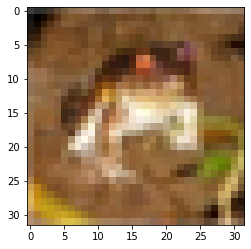

In [ ]:
plt.imshow(X_train[0])

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train=y_train.reshape(-1,)

In [ ]:
y_train.shape

(50000,)

In [ ]:
y_test=y_test.reshape(-1,)

In [ ]:
y_test.shape

(10000,)

In [ ]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize = (50,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

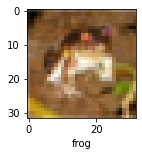

In [ ]:
plot_sample(X_train,y_train,0)

In [ ]:
X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.8138 - accuracy: 0.3549
Epoch 2/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.6233 - accuracy: 0.4278
Epoch 3/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.5410 - accuracy: 0.4564
Epoch 4/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.4836 - accuracy: 0.4782
Epoch 5/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.4347 - accuracy: 0.4953


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.49      0.55      1000
           1       0.59      0.64      0.61      1000
           2       0.37      0.39      0.38      1000
           3       0.30      0.58      0.39      1000
           4       0.45      0.38      0.41      1000
           5       0.56      0.18      0.27      1000
           6       0.52      0.53      0.52      1000
           7       0.70      0.38      0.49      1000
           8       0.61      0.63      0.62      1000
           9       0.47      0.65      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.52      0.48      0.48     10000
weighted avg       0.52      0.48      0.48     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.4910 - accuracy: 0.4612
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1617 - accuracy: 0.5907
Epoch 3/10
1563/1563 [==============================] - 60s 39ms/step - loss: 1.0261 - accuracy: 0.6411
Epoch 4/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9504 - accuracy: 0.6706
Epoch 5/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8887 - accuracy: 0.6934
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8379 - accuracy: 0.7102
Epoch 7/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8013 - accuracy: 0.7207
Epoch 8/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7642 - accuracy: 0.7350
Epoch 9/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.7275 - accuracy: 0.7464
Epoch 10/10
1563/1563 [==============================] - 60s 39m

In [ ]:
cnn.evaluate(X_test,y_test)


313/313 [==============================] - 4s 12ms/step - loss: 0.9069 - accuracy: 0.6972


[0.9068630933761597, 0.6972000002861023]